# Differential Physics Assignment Sheet 3(Adv DL for Physics)

In [1]:
from phi.torch.flow import *
import numpy as np

print(f'CUDA Available? {torch.cuda.is_available()}')

CUDA Available? True


In [2]:
X = 8
x = math.linspace(0, 8, 48, dim=spatial('xs'))
random_sign = math.sign(math.random_uniform(batch(b=6), low=-1, high=1)) 
alpha = math.random_uniform(batch(b=6), low=-8, high=8)

u_0 = math.cos(2*x) + 0.1 * random_sign * math.cos(2 * math.pi * x/X) * (1 - alpha * math.sin(2 * math.pi * x/X))
#u_0 = math.cos(2*x) + 0.1 * math.cos(2 * math.pi * x/X) * (1 - math.sin(2 * math.pi * x/X))
u_0

(bᵇ=6, xsˢ=48) float32  -0.017 ± 0.778 (-1e+00...1e+00)

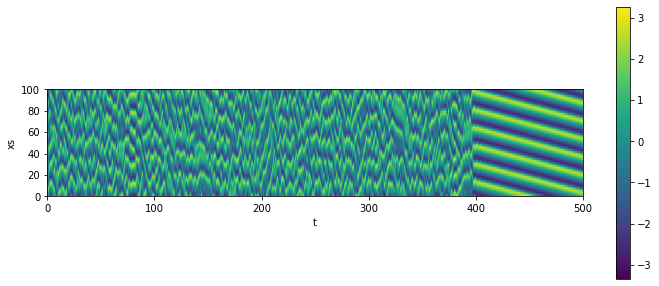

<Figure size 432x288 with 0 Axes>

In [3]:
##Precomputing Constants
k = math.fftfreq(spatial(xs = int(x.shape[0])), dx = 1) * 2 * math.pi 
k = math.unstack(k, 'vector')[0]

# This is what the above code does
# k1 = math.linspace(-23,-1,23,spatial('xs')) * 2 * math.pi / 48
# k2 = math.linspace(0,23,24,spatial('xs')) * 2 * math.pi / 48
# k3 = math.linspace(24,24,1, spatial('xs')) * 2 * math.pi / 48
# k = math.concat([k2,k3,k1], 'xs')

L = k**2 - k**4
dt = 0.5
e_Ldt = math.exp(L*dt)
def N_(u):
    u = math.ifft(u)
    return -0.5j * k * math.fft(u*u) 
def P(u):
    u = math.fft(u)
    an = u * e_Ldt + N_(u) * math.where(L==0, 0.5, (e_Ldt - 1)/L) 
    u1 = an + (N_(an) - N_(u)) * math.where(L==0, 0.25, (e_Ldt - 1 - L*dt)/(L**2 * dt)) 
    return math.real(math.ifft(u1)) 

u = u_0
u_solution = math.expand(u, spatial('t'))

for i in range(8000):
    u = P(u)
    u_solution = math.concat([u_solution, math.expand(u, spatial('t'))], dim='t')

##Plotting batch = 0 solution
vis.plot(CenteredGrid(math.real(u_solution.b[0]), 0, Box(xs=100, t=500)))

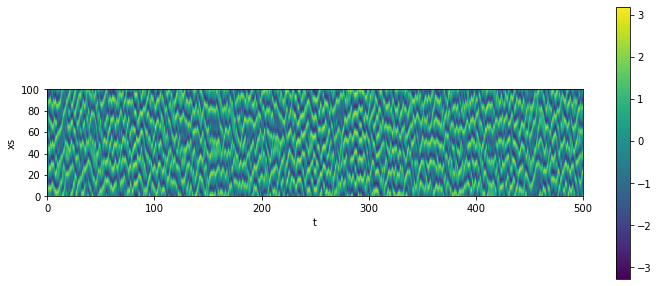

<Figure size 432x288 with 0 Axes>

In [4]:
#Plotting a different batch
vis.plot(CenteredGrid(math.real(u_solution.b[2]), 0, Box(xs=100, t=500)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class ConvResNet(nn.Module):
    def __init__(self):

        super(ConvResNet, self).__init__()
        
        self.conv1 = nn.Conv1d(1,4,3,stride=1, padding=1, padding_mode='circular')
        #self.bn1 = nn.BatchNorm1d(4)

        self.conv2 = nn.Conv1d(4,16,3,stride=1, padding=1, padding_mode='circular')
        #self.bn2 = nn.BatchNorm1d(16)

        self.conv_short1 = nn.Conv1d(1,16, 1, 1)

        self.conv3 = nn.Conv1d(16,32,3,stride=1, padding=1, padding_mode='circular')
        #self.bn3 = nn.BatchNorm1d(32)

        self.conv4 = nn.Conv1d(32,32,3,stride=1, padding=1, padding_mode='circular')
        #self.bn4 = nn.BatchNorm1d(32)

        self.conv_short2 = nn.Conv1d(16, 32, 1,1)

        self.conv5 = nn.Conv1d(32,32,3,stride=1, padding=1, padding_mode='circular')
        #self.bn5 = nn.BatchNorm1d(32)

        self.conv6 = nn.Conv1d(32,32,3,stride=1, padding=1, padding_mode='circular')
        #self.bn6 = nn.BatchNorm1d(32)

        self.conv_short3 = nn.Conv1d(32, 32, 1, 1)

        self.conv7 = nn.Conv1d(32,16,3,stride=1, padding=1, padding_mode='circular')
        #self.bn7 = nn.BatchNorm1d(16)

        self.conv8 = nn.Conv1d(16,8,3,stride=1, padding=1, padding_mode='circular')
        #self.bn8 = nn.BatchNorm1d(8)

        self.conv_short4 = nn.Conv1d(32, 8, 1, 1)

        self.conv9 = nn.Conv1d(8,8,3,stride=1, padding=1, padding_mode='circular')
        #self.bn9 = nn.BatchNorm1d(8)

        self.conv10 = nn.Conv1d(8,4,3,stride=1, padding=1, padding_mode='circular')
        #self.bn10 = nn.BatchNorm1d(4)

        self.conv_short5 = nn.Conv1d(8, 4, 1, 1)

        self.conv11 = nn.Conv1d(4, 1, 3, stride=1, padding=1, padding_mode='circular')

    def forward(self,x):
        '''
        x1 = F.relu(self.bn1(self.conv1(x)))
        x1 = F.relu(self.bn2(self.conv2(x1)))
        x1 = x1 + self.conv_short1(x)

        x2 = F.relu(self.bn3(self.conv3(x1)))
        x2 = F.relu(self.bn4(self.conv4(x2)))
        x2 = x2 + self.conv_short2(x1)

        x3 = F.relu(self.bn5(self.conv5(x2)))
        x3 = F.relu(self.bn6(self.conv6(x3)))
        x3 = x3 + self.conv_short3(x2)

        x4 = F.relu(self.bn7(self.conv7(x3)))
        x4 = F.relu(self.bn8(self.conv8(x4)))
        x4 = x4 + self.conv_short4(x3)

        x5 = F.relu(self.bn9(self.conv9(x4)))
        x5 = F.relu(self.bn10(self.conv10(x5)))
        x5 = x5 + self.conv_short5(x4)
        '''
        x1 = F.relu(self.conv1(x))
        x1 = F.relu(self.conv2(x1))
        x1 = x1 + self.conv_short1(x)

        x2 = F.relu(self.conv3(x1))
        x2 = F.relu(self.conv4(x2))
        x2 = x2 + self.conv_short2(x1)

        x3 = F.relu(self.conv5(x2))
        x3 = F.relu(self.conv6(x3))
        x3 = x3 + self.conv_short3(x2)

        x4 = F.relu(self.conv7(x3))
        x4 = F.relu(self.conv8(x4))
        x4 = x4 + self.conv_short4(x3)

        x5 = F.relu(self.conv9(x4))
        x5 = F.relu(self.conv10(x5))
        x5 = x5 + self.conv_short5(x4)

        out = self.conv11(x5)

        return out

In [6]:
model = ConvResNet().to('cuda')
n_model_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Model Parameters : {n_model_parameters}')

Model Parameters : 15293


In [7]:
u_initial = u_solution.t[0]
#u_initial = math.expand(u_initial, channel(c=1))

u_initial = CenteredGrid(u_initial)
print(u_initial.shape)
uf = field.native_call(model, u_initial)
uf

(bᵇ=6, xsˢ=48)


CenteredGrid[(bᵇ=6, xsˢ=48), size=[48], extrapolation=0.0]

## Supervised Learning
Below we use our saved u_solution for t = 8000 steps to learn the solution of Kuramoto Sivashinsky equation through supervised learning

In [8]:
model_sp = ConvResNet().to('cuda')
num_epochs = 1
num_time_steps = 8000
optimizer = adam(model_sp, learning_rate=1e-3)

def loss_func(u, pred):
    #print(u.shape)
    loss = 0
    pred = math.native_call(model_sp, u.t[0])
    for i in range(5):
        loss += math.l2_loss( pred - u.t[i+1])
        pred = math.native_call(model_sp, pred)

    return math.sum(loss,'b')

pred = math.native_call(model_sp, u_solution.t[0])
for epoch in range(1,num_epochs+1):
    for step in range(num_time_steps-5):
        loss = update_weights(model_sp, optimizer, loss_func, u_solution.t[step: step+6], pred)
        if(step%1000==0):
            print(f'Epoch : {epoch}, step : {step}, Loss : {loss}')
    

Epoch : 1, step : 0, Loss : 661.7742919921875
Epoch : 1, step : 1000, Loss : 0.888321042060852
Epoch : 1, step : 2000, Loss : 0.1859591156244278
Epoch : 1, step : 3000, Loss : 0.20299853384494781
Epoch : 1, step : 4000, Loss : 0.16611887514591217
Epoch : 1, step : 5000, Loss : 0.14866551756858826
Epoch : 1, step : 6000, Loss : 0.07764832675457001
Epoch : 1, step : 7000, Loss : 0.1227337121963501


## Evaluating Supervised Model on Test Data
Below we evaluate our supervised learning model on unknown test data

In [9]:
##Test Data
alpha_test = math.random_uniform(batch(b=1), low=-1, high=1) * 8
u_test_0 = math.cos(2*x) - 0.1 * math.cos(2 * math.pi * x/X) * (1 - alpha_test * math.sin(2 * math.pi * x/X))

In [10]:
u_test = u_test_0

##Loss_L2 : Between simulated trajectory and predicted trajectory
Loss_L2 = math.expand(math.l2_loss( math.native_call(model_sp, u_test) - P(u_test)), instance('i'))

##Loss_P : Between function P and neural network fnn where un is predicted trajectory 
Loss_P = Loss_L2

u_pred = math.native_call(model_sp, u_test)
u_test = P(u_test)
u_pred_solution = math.expand(u_pred, spatial('t'))
u_solver_solution = math.expand(u_test, spatial('t'))
for step in range(500):
    
    Loss_P = math.concat([Loss_P, math.expand(math.l2_loss( math.native_call(model_sp, u_pred) - P(u_pred)),instance('i')) ], 'i')
    Loss_L2 = math.concat([Loss_L2, math.expand( math.l2_loss( math.native_call(model_sp, u_pred) - P(u_test)), instance('i'))],'i')

    u_pred = math.native_call(model_sp, u_pred)
    u_test = P(u_test)

    u_pred_solution = math.concat([u_pred_solution, math.expand(u_pred, spatial('t'))], 't')
    u_solver_solution = math.concat([u_solver_solution, math.expand(u_test, spatial('t'))], 't')
    if step%20==0:
        print(f'Step: {step}, Loss_L2 : {Loss_L2.i[-1]}, Loss_Physics : {Loss_P.i[-1]}')


Step: 0, Loss_L2 : [0.05973866], Loss_Physics : [0.04890908]
Step: 20, Loss_L2 : [0.9591264], Loss_Physics : [0.00177979]
Step: 40, Loss_L2 : [15.727296], Loss_Physics : [0.00181222]
Step: 60, Loss_L2 : [10.125889], Loss_Physics : [0.00226364]
Step: 80, Loss_L2 : [49.68838], Loss_Physics : [0.00209061]
Step: 100, Loss_L2 : [78.6351], Loss_Physics : [0.00985457]
Step: 120, Loss_L2 : [136.01566], Loss_Physics : [0.00184912]
Step: 140, Loss_L2 : [75.51036], Loss_Physics : [0.00134402]
Step: 160, Loss_L2 : [97.9081], Loss_Physics : [0.00262264]
Step: 180, Loss_L2 : [111.84475], Loss_Physics : [0.00340701]
Step: 200, Loss_L2 : [79.6244], Loss_Physics : [0.00099823]
Step: 220, Loss_L2 : [138.09775], Loss_Physics : [0.0027481]
Step: 240, Loss_L2 : [87.39595], Loss_Physics : [0.00264898]
Step: 260, Loss_L2 : [66.70978], Loss_Physics : [0.0027728]
Step: 280, Loss_L2 : [50.65777], Loss_Physics : [0.00422014]
Step: 300, Loss_L2 : [51.95298], Loss_Physics : [0.00334841]
Step: 320, Loss_L2 : [118.6

Plotting the predicted data:

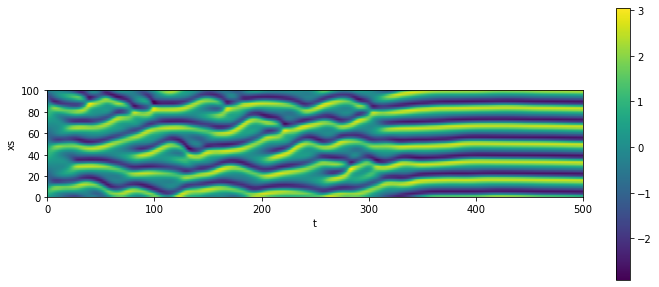

<Figure size 432x288 with 0 Axes>

In [11]:
vis.plot(CenteredGrid(math.real(u_pred_solution.b[0]), 0, Box(xs=100, t=500)))

Plotting actual solution Data:

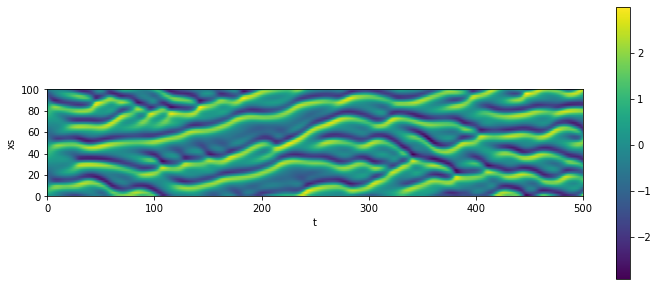

<Figure size 432x288 with 0 Axes>

In [12]:
vis.plot(CenteredGrid(math.real(u_solver_solution.b[0]), 0, Box(xs=100, t=500)))

The predictions are quite accurate indeed!

Now Plotting how the loss behaves between solver and network solutions for the course of 500 time steps:
## L2 Loss

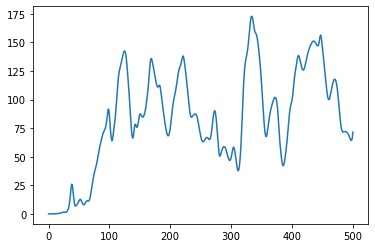

In [13]:
import matplotlib.pyplot as plt
x_plot = np.arange(501)
y_plot = Loss_L2.b[0]
plt.plot(x_plot,y_plot.numpy())

## Physics Loss

## 

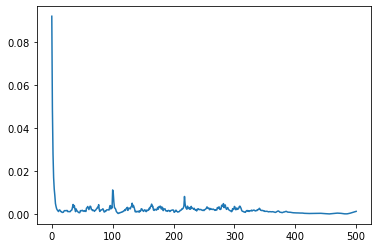

In [14]:
x_plot = np.arange(501)
y_plot = Loss_P.b[0]
plt.plot(x_plot,y_plot.numpy())

As we can see the L2 loss curve doesn't look good but the Physics loss curve looks reasonable for subsequent predictions

## Training via Differential Physics Loss 

In [21]:
model_dp = ConvResNet().to('cuda')

def norm(v):
    return math.sqrt(2 * math.l2_loss(v))
def loss_func_dp(u):
    loss = 0
    for i in range(5):
        u_pred = math.native_call(model_dp, u)
        loss += math.l2_loss(u_pred - P(u))/(1 + math.l2_loss(u_pred))
        u = u_pred
    return math.sum(loss, 'b')

num_epochs = 1
num_time_steps = 8000
u = u_0
u_dp_solution = math.expand(u, spatial('t'))
optimizer = adam(model_dp, learning_rate=1e-3)
for epoch in range(1,num_epochs+1):
    for step in range(num_time_steps):
        loss = update_weights(model_dp, optimizer, loss_func_dp, u)
        #u1 = math.native_call(model_dp, u)
        u = P(u)
        if(step%1000==0):
            print(f'Epoch : {epoch}, step : {step}, Loss : {loss}')
        u_dp_solution = math.concat([u_dp_solution, math.expand(u, spatial('t'))], 't')

Epoch : 1, step : 0, Loss : 91.30718231201172
Epoch : 1, step : 1000, Loss : 0.0050804284401237965
Epoch : 1, step : 2000, Loss : 0.0010371028911322355
Epoch : 1, step : 3000, Loss : 0.00103003962431103
Epoch : 1, step : 4000, Loss : 0.0003671613521873951
Epoch : 1, step : 5000, Loss : 0.0004060802748426795
Epoch : 1, step : 6000, Loss : 0.00029775412986055017
Epoch : 1, step : 7000, Loss : 0.00017727541853673756


The Loss goes down much better in the differentialble physics case as compared to simple supervised case!

Also as stated in the worksheet, the loss at step 0 at the beginning of the epoch is not high anymore (unlike the above supervised learning case) because of the normalizing factor in the denominator of the loss that penalizes fnn = 0.

In [22]:
u_test = u_test_0

##Loss_L2 : Between simulated trajectory and predicted trajectory
Loss_L2 = math.expand(math.l2_loss( math.native_call(model_dp, u_test) - P(u_test)), instance('i'))

##Loss_P : Between function P and neural network fnn where un is predicted trajectory 
Loss_P = Loss_L2

u_pred = math.native_call(model_dp, u_test)
u_test = P(u_test)
u_pred_solution = math.expand(u_pred, spatial('t'))
u_solver_solution = math.expand(u_test, spatial('t'))
for step in range(500):
    
    Loss_P = math.concat([Loss_P, math.expand(math.l2_loss( math.native_call(model_dp, u_pred) - P(u_pred)),instance('i')) ], 'i')
    Loss_L2 = math.concat([Loss_L2, math.expand( math.l2_loss( math.native_call(model_dp, u_pred) - P(u_test)), instance('i'))],'i')

    u_pred = math.native_call(model_dp, u_pred)
    u_test = P(u_test)

    u_pred_solution = math.concat([u_pred_solution, math.expand(u_pred, spatial('t'))], 't')
    u_solver_solution = math.concat([u_solver_solution, math.expand(u_test, spatial('t'))], 't')

    if step%20==0:
        print(f'Step: {step}, Loss_L2 : {Loss_L2.i[-1]}, Loss_Physics : {Loss_P.i[-1]}')


Step: 0, Loss_L2 : [0.00653714], Loss_Physics : [0.0011928]
Step: 20, Loss_L2 : [0.8455695], Loss_Physics : [0.00066893]
Step: 40, Loss_L2 : [17.714794], Loss_Physics : [0.00142818]
Step: 60, Loss_L2 : [40.378548], Loss_Physics : [0.00070883]
Step: 80, Loss_L2 : [41.878357], Loss_Physics : [0.00120694]
Step: 100, Loss_L2 : [71.50145], Loss_Physics : [0.00138705]
Step: 120, Loss_L2 : [80.01661], Loss_Physics : [0.00089099]
Step: 140, Loss_L2 : [83.466286], Loss_Physics : [0.00075708]
Step: 160, Loss_L2 : [80.20642], Loss_Physics : [0.00112174]
Step: 180, Loss_L2 : [44.034943], Loss_Physics : [0.00121985]
Step: 200, Loss_L2 : [83.12973], Loss_Physics : [0.00057965]
Step: 220, Loss_L2 : [44.845615], Loss_Physics : [0.00276421]
Step: 240, Loss_L2 : [61.869938], Loss_Physics : [0.00069315]
Step: 260, Loss_L2 : [71.6042], Loss_Physics : [0.00123846]
Step: 280, Loss_L2 : [65.10991], Loss_Physics : [0.00095704]
Step: 300, Loss_L2 : [53.84505], Loss_Physics : [0.00081798]
Step: 320, Loss_L2 : [

## L2 Loss

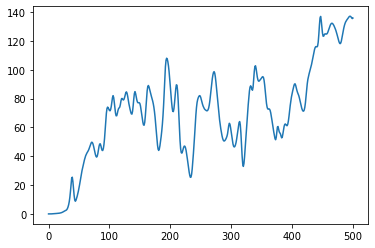

In [23]:
import matplotlib.pyplot as plt
x_plot = np.arange(len(Loss_L2.b[0]))
y_plot = Loss_L2.b[0]
plt.plot(x_plot,y_plot.numpy())

## Physics Loss

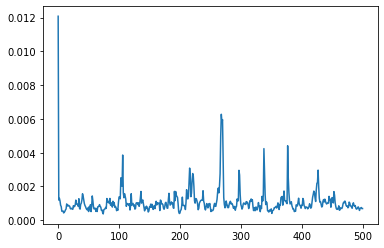

In [24]:
x_plot = np.arange(len(Loss_P.b[0]))
y_plot = Loss_P.b[0]
plt.plot(x_plot,y_plot.numpy())

## Predicted Solution

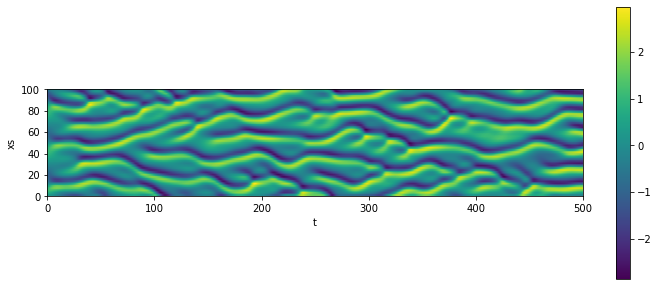

<Figure size 432x288 with 0 Axes>

In [25]:
vis.plot(CenteredGrid(math.real(u_pred_solution.b[0]), 0, Box(xs=100, t=500)))

## Actual Solution

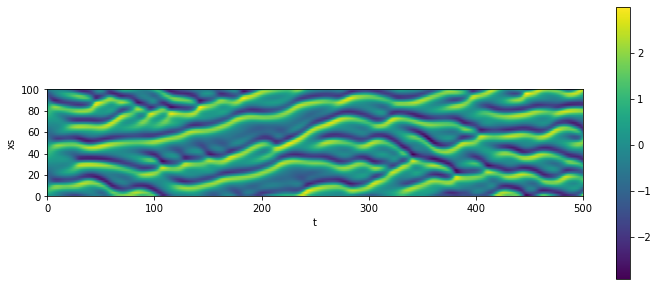

<Figure size 432x288 with 0 Axes>

In [26]:
vis.plot(CenteredGrid(math.real(u_solver_solution.b[0]), 0, Box(xs=100, t=500)))

Our Predicted solution this time is now closer to the Actual Solution for lesser number of epochs.

Contrary to the popular cases for the above proposed ConvResnet network, both supervised and unsupervised approaches provide stable solutions in time. 

Also our net physics loss goes to lower values than the supervised learning case. 

This is mainly because of the differential unsupervised loss tries to preserve the physics rather than match the target data, helping it learn multiple possible solution variants of the solution of the Kuramoto Sivashinsky equation!! 